In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
taxi_df = pd.read_parquet('data/yellow_tripdata_2024-01.parquet')
# taxi_df = pd.concat([taxi_jan_2024])

In [3]:
taxi_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [4]:
taxi_df.shape

(2964624, 19)

In [5]:
taxi_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [6]:
taxi_df=taxi_df[['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count',
                'trip_distance','RatecodeID','PULocationID','DOLocationID','payment_type',
                'total_amount']]

In [7]:
taxi_df.head()#priting the specific columns

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

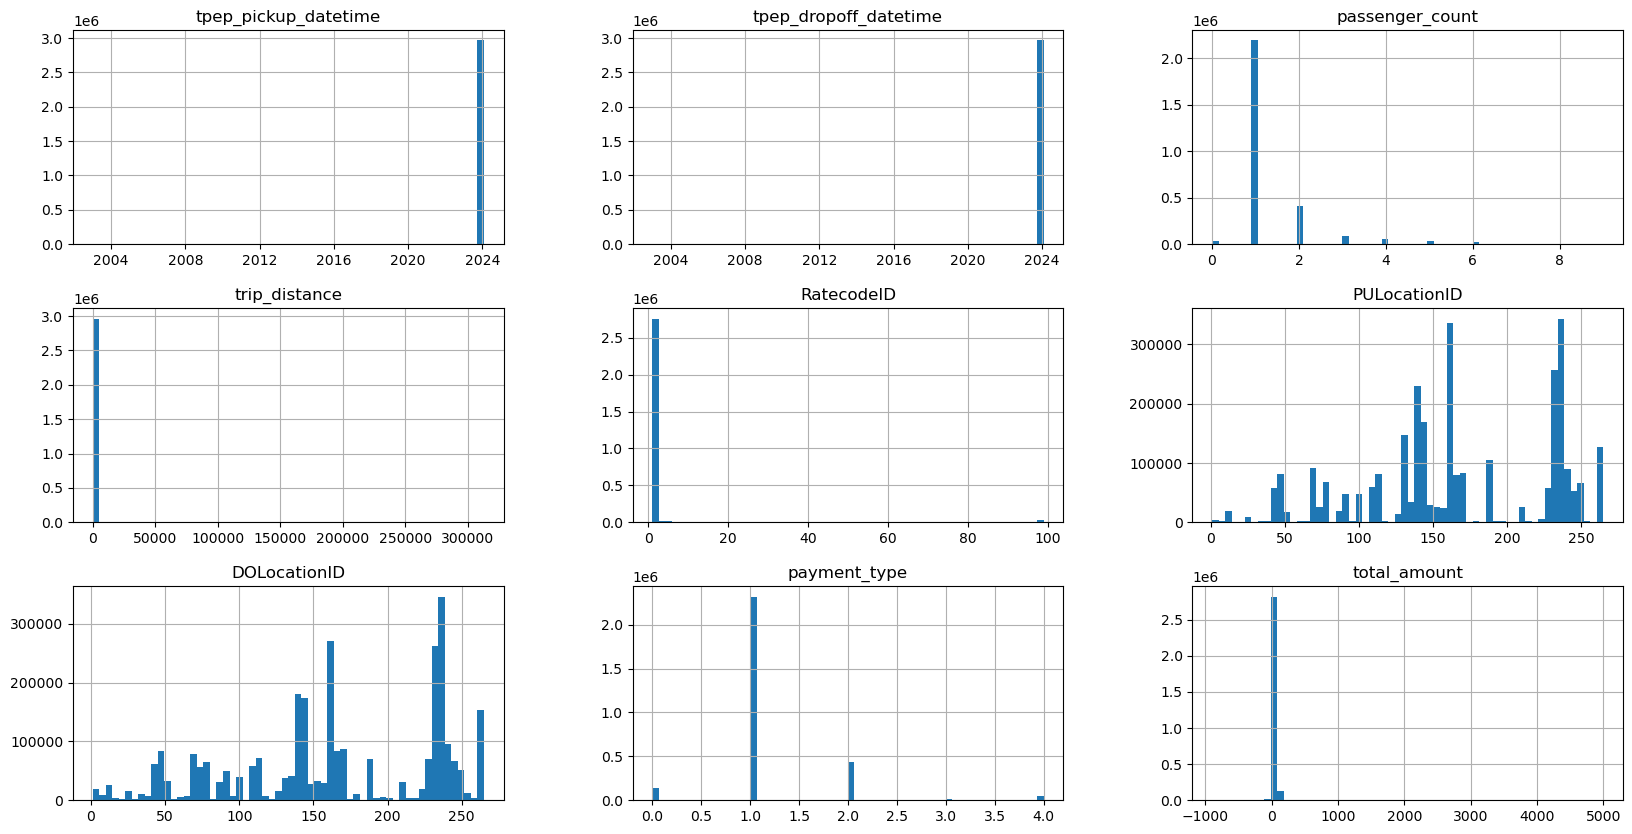

In [8]:
taxi_df.hist(figsize=(20,10),bins=60)

In [9]:
taxi_df['RatecodeID'].value_counts() #value counts lets us count the occurence of each unique element

RatecodeID
1.0     2663350
2.0       98713
99.0      28663
5.0       19410
3.0        7954
4.0        6365
6.0           7
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

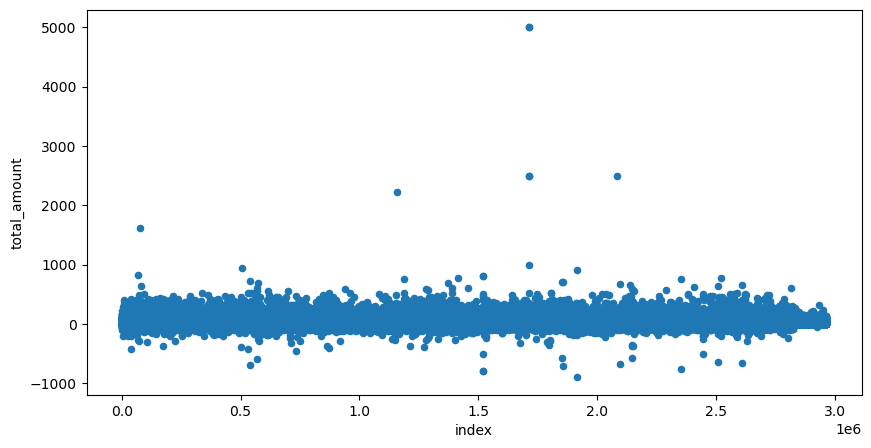

In [10]:
taxi_df.reset_index().plot(kind='scatter',y='total_amount',x='index',figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

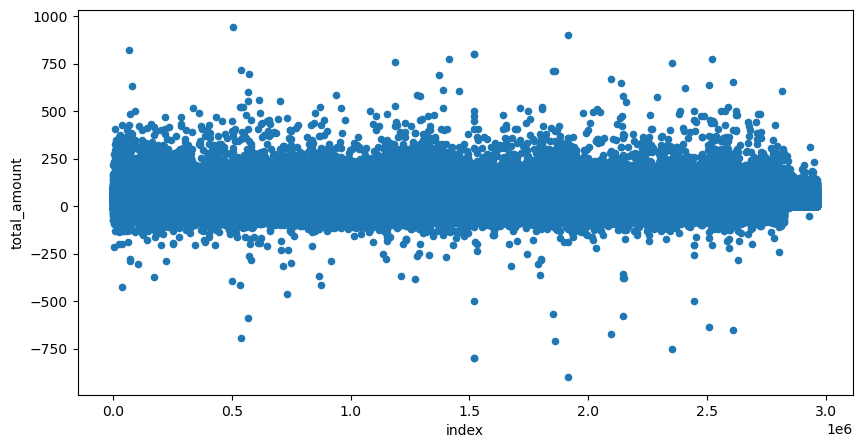

In [11]:
taxi_df[taxi_df['total_amount'] < 1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10, 5))

In [12]:
print(taxi_df[taxi_df['total_amount']<0].shape)

(35504, 9)


<Axes: xlabel='index', ylabel='total_amount'>

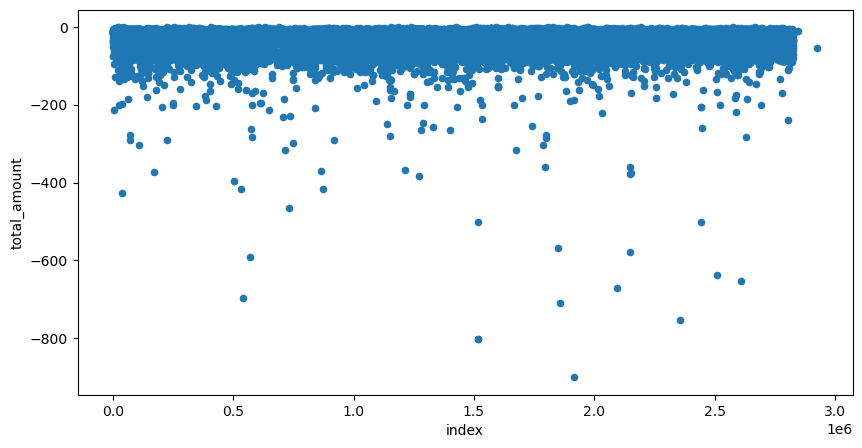

In [13]:
taxi_df[taxi_df['total_amount'] < 0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10, 5))

In [14]:
taxi_df[taxi_df['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
99,2024-01-01 00:18:24,2024-01-01 00:30:39,1.0,2.16,1.0,249,232,4,-18.50
506,2024-01-01 00:04:00,2024-01-01 00:04:44,1.0,0.01,5.0,63,63,2,-34.25
536,2024-01-01 00:41:42,2024-01-01 00:46:00,1.0,0.47,1.0,249,113,4,-10.80
552,2024-01-01 00:42:02,2024-01-01 01:14:33,1.0,5.48,1.0,107,61,2,-38.10
682,2024-01-01 00:24:02,2024-01-01 01:10:32,1.0,8.74,1.0,90,225,4,-52.80


In [15]:
taxi_df[taxi_df['total_amount']<0]['payment_type'].value_counts

<bound method IndexOpsMixin.value_counts of 99         4
506        2
536        4
552        2
682        4
          ..
2824361    4
2824372    3
2824403    4
2844756    0
2927270    0
Name: payment_type, Length: 35504, dtype: int64>

<Axes: >

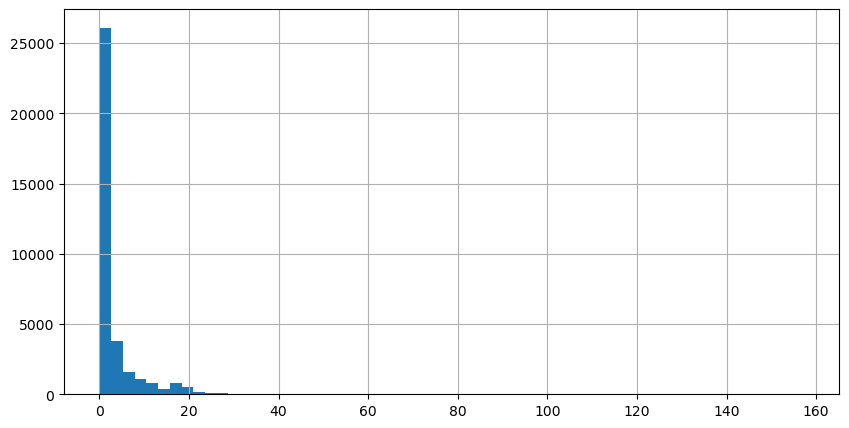

In [16]:
taxi_df[taxi_df['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10,5))
#looking at the trip distance when the total amount is zero

In [17]:
#i see that we have people paying at zero value too so we can get rid of that

In [18]:
print(taxi_df[taxi_df['total_amount']==0].shape)
taxi_df[taxi_df['total_amount']==0].head()

(416, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
854,2024-01-01 00:27:42,2024-01-01 00:28:49,1.0,0.2,1.0,239,143,4,0.0
29224,2024-01-01 10:01:27,2024-01-01 10:01:27,1.0,0.0,5.0,239,264,2,0.0
39191,2024-01-01 13:46:41,2024-01-01 14:12:06,1.0,0.0,99.0,42,216,1,0.0
39591,2024-01-01 13:03:22,2024-01-01 13:03:24,1.0,0.0,1.0,264,264,2,0.0
39592,2024-01-01 13:05:28,2024-01-01 13:05:35,1.0,0.0,1.0,193,193,2,0.0


In [19]:
taxi_df[taxi_df['total_amount']==0]['payment_type'].value_counts()

payment_type
1    129
4    128
3     83
2     65
0     11
Name: count, dtype: int64

<Axes: >

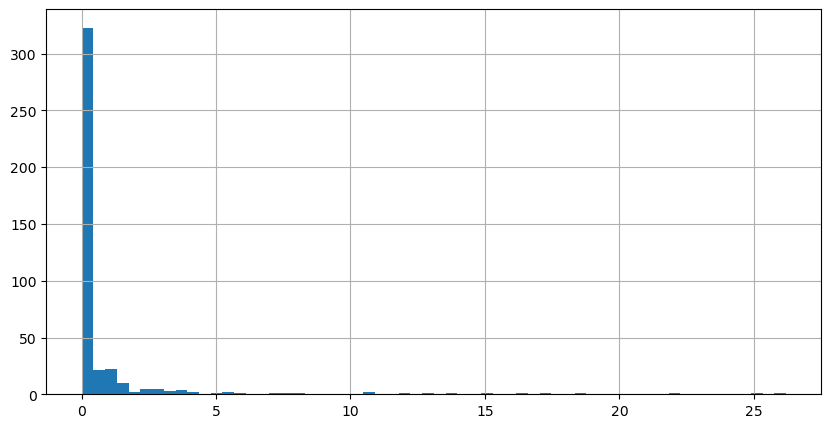

In [20]:
taxi_df[taxi_df['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [21]:
taxi_df[taxi_df['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     287
0.10      21
0.20       8
0.90       8
0.50       7
1.60       6
1.00       5
0.80       5
0.70       5
1.10       4
0.30       4
1.30       4
0.60       4
0.40       3
3.00       3
2.50       3
2.40       2
3.40       2
3.80       2
1.80       2
1.70       2
10.70      2
12.10      1
25.10      1
1.40       1
12.80      1
1.74       1
2.70       1
18.40      1
15.00      1
5.30       1
3.30       1
2.90       1
17.10      1
4.20       1
3.50       1
4.00       1
21.90      1
16.50      1
26.20      1
13.60      1
7.70       1
3.60       1
5.50       1
5.80       1
4.90       1
8.10       1
1.20       1
7.00       1
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

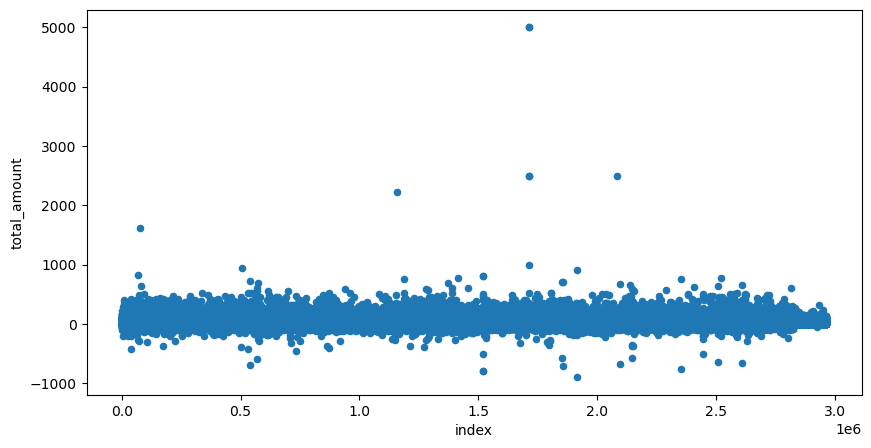

In [22]:
taxi_df.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [23]:
taxi_df[taxi_df['total_amount']>200].shape #checking for the values more than 200,basically we cannot go higher than this 
#price range

(2005, 9)

In [24]:
taxi_df['total_amount'].mean() #mean amount people are paying for the taxi

26.801504770925415

In [30]:
taxi_data_filtered = taxi_df[(taxi_df['total_amount'] >= 0) & (taxi_df['total_amount'] < 200)]

#getting rid of all the negative values and zero's and all the values lower than 200

In [31]:
print(taxi_df.shape)
taxi_data_filtered.shape

(2964624, 9)


(2927107, 9)

Checking for missing values

In [35]:
taxi_data_filtered.isna().sum()

#using pandas
#This uses the Pandas DataFrame method isna() to create a DataFrame of boolean values. True indicates a missing or 
#null value, and False indicates a non-missing value.

tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140153
trip_distance                 0
RatecodeID               140153
PULocationID                  0
DOLocationID                  0
payment_type                  0
total_amount                  0
dtype: int64

In [43]:
#dropping the missing values
taxi_data_filtered_clean = taxi_data_filtered.dropna()

In [44]:
# Check the shape of the cleaned DataFrame
print("Shape of original DataFrame:", taxi_data_filtered.shape)
print("Shape of cleaned DataFrame:", taxi_data_filtered_clean.shape)

Shape of original DataFrame: (2927107, 9)
Shape of cleaned DataFrame: (2786954, 9)


In [47]:
#checking again
missing_values = taxi_data_filtered_clean.isna().sum()

# Display the count of missing values
print(missing_values)

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64


df.dropna() -> This drops the rows where atleast one value is missing